___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [25]:
# IMPORTS HERE
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [3]:
# CODE HERE
df = pd.read_csv('Miles_Traveled.csv', index_col='DATE', parse_dates=True)
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [4]:
# CODE HERE
df.columns = ['Value']

In [5]:
df.head(2)

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0


**TASK: Plot out the time series**

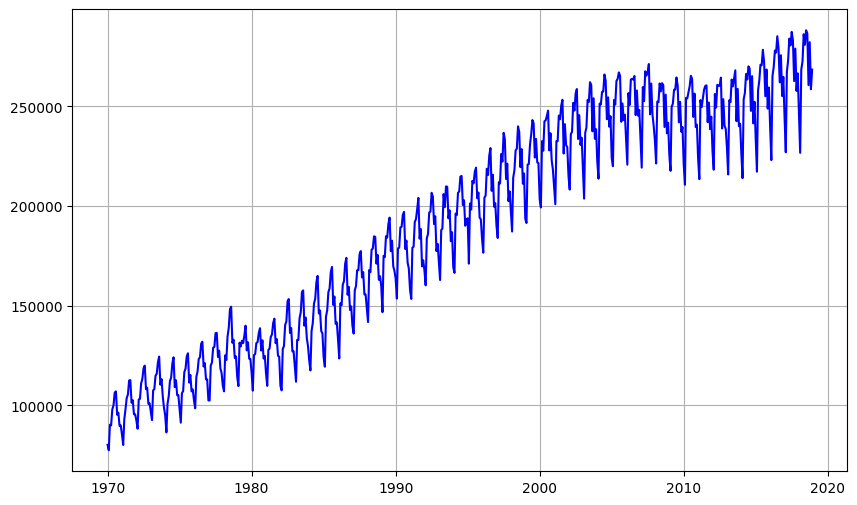

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], linestyle='-', color='b')

plt.grid(True)
plt.show()

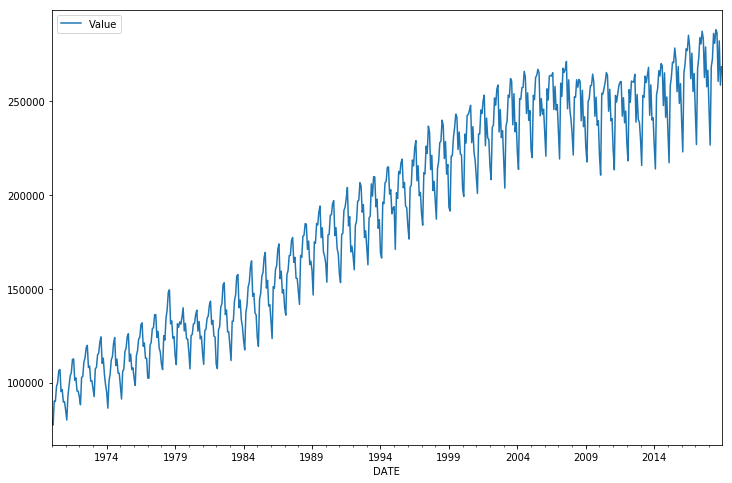

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

<Figure size 1000x800 with 0 Axes>

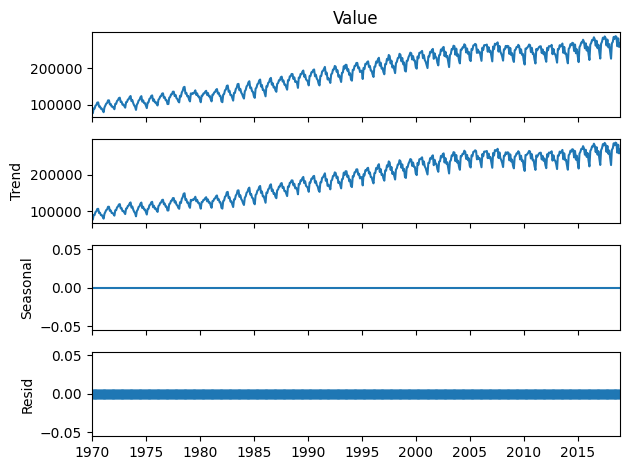

In [11]:
# CODE HERE
 # period is 1 since we have monthly data
result = seasonal_decompose(df['Value'], model='additive', period=1)

plt.figure(figsize=(10, 8))
result.plot()
plt.show()

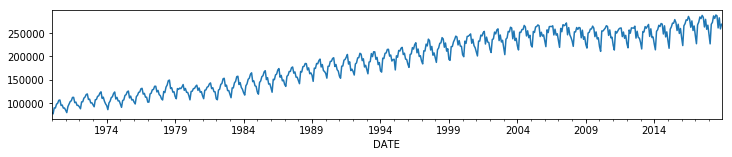

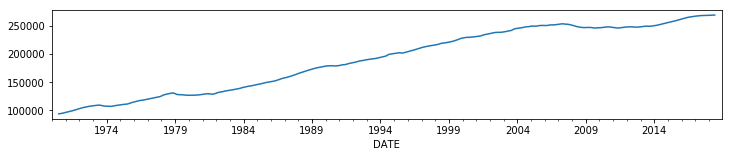

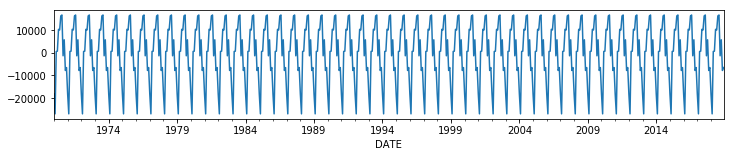

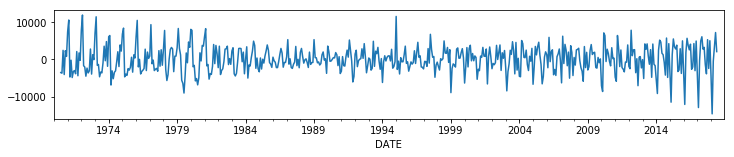

## Train Test Split

**TASK: Figure out the length of the data set**

In [12]:
# CODE HERE
len(df)

588

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [14]:
# CODE HERE
test_size = 12
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

In [15]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [17]:
# CODE HERE
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [19]:
#CODE HERE
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

Using TensorFlow backend.


### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [27]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 150)               91200     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91351 (356.84 KB)
Trainable params: 91351 (356.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [29]:
# CODE HERE

early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='loss', save_best_only=True, verbose=1)

history = model.fit(generator, epochs=200, callbacks=[early_stopping, model_checkpoint])

Epoch 1/200
562/564 [============================>.] - ETA: 0s - loss: 0.0107
Epoch 1: loss improved from inf to 0.01065, saving model to best_model.h5
564/564 [==============================] - 11s 16ms/step - loss: 0.0106


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/200
563/564 [============================>.] - ETA: 0s - loss: 0.0056
Epoch 2: loss improved from 0.01065 to 0.00564, saving model to best_model.h5
564/564 [==============================] - 8s 13ms/step - loss: 0.0056
Epoch 3/200
563/564 [============================>.] - ETA: 0s - loss: 0.0038
Epoch 3: loss improved from 0.00564 to 0.00383, saving model to best_model.h5
564/564 [==============================] - 7s 12ms/step - loss: 0.0038
Epoch 4/200
562/564 [============================>.] - ETA: 0s - loss: 0.0026
Epoch 4: loss improved from 0.00383 to 0.00255, saving model to best_model.h5
564/564 [==============================] - 6s 11ms/step - loss: 0.0026
Epoch 5/200
562/564 [============================>.] - ETA: 0s - loss: 0.0019
Epoch 5: loss improved from 0.00255 to 0.00189, saving model to best_model.h5
564/564 [==============================] - 8s 15ms/step - loss: 0.0019
Epoch 6/200
562/564 [============================>.] - ETA: 0s - loss: 0.0012
Epoch 6: loss 

Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

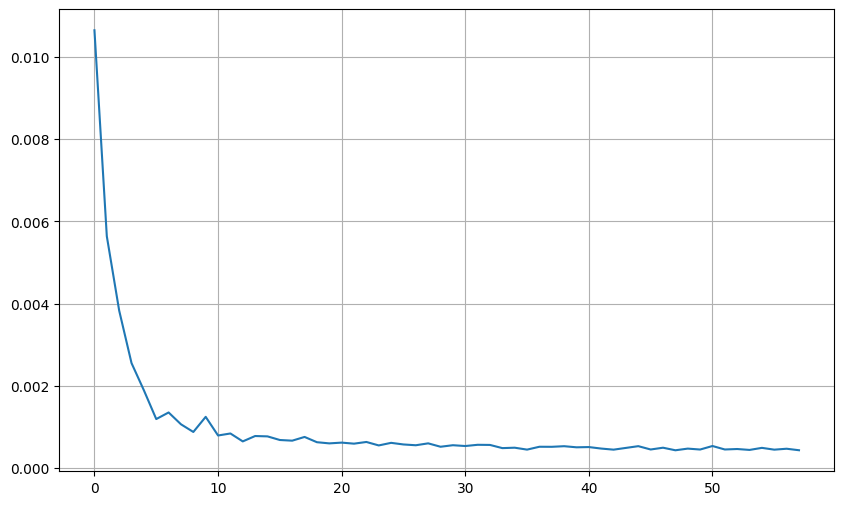

In [30]:
# CODE HERE
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

dict_keys(['loss'])

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [36]:
# CODE HERE
first_eval_batch = scaled_train[-2*n_input:]
first_eval_batch

array([[0.77292152],
       [0.69351266],
       [0.89425491],
       [0.91572217],
       [0.95535514],
       [0.95068151],
       [0.98959986],
       [0.96126745],
       [0.87944793],
       [0.94410222],
       [0.84664675],
       [0.89249694],
       [0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

**TASK: Generate predictions into the same time stamps as the test set**

In [37]:
# CODE HERE
test_generator = TimeseriesGenerator(first_eval_batch, first_eval_batch, length=12, batch_size=1)

predictions = model.predict(test_generator)
print(predictions)

12/12 [==============================] - 0s 7ms/step
[[0.78086525]
 [0.7125884 ]
 [0.8866072 ]
 [0.91363037]
 [0.956075  ]
 [0.950966  ]
 [0.9893157 ]
 [0.95884824]
 [0.8856688 ]
 [0.93932134]
 [0.8512587 ]
 [0.89240634]]


## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [38]:
#CODE HERE
predictions = scaler.inverse_transform(predictions)
predictions

array([[241346.39],
       [227015.03],
       [263541.72],
       [269213.94],
       [278123.1 ],
       [277050.72],
       [285100.34],
       [278705.22],
       [263344.75],
       [274606.47],
       [256122.03],
       [264758.97]], dtype=float32)

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [41]:
test.values.flatten()

array([245695., 226660., 268480., 272475., 286164., 280877., 288145.,
       286608., 260595., 282174., 258590., 268413.])

In [45]:
pd.date_range(start='2018-01-01', periods=12, freq='MS')

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [46]:
# CODE HERE
dates = pd.date_range(start='2018-01-01', periods=12, freq='MS')
dates
results_df = pd.DataFrame({
    'Values': test.values.flatten(),
    'Predictions': predictions.flatten(),
    'Date': dates

})

results_df = results_df.set_index('Date')
results_df

,Values,Predictions
Date,,
2018-01-01,245695.0,241346.390625
2018-02-01,226660.0,227015.031250
2018-03-01,268480.0,263541.718750
2018-04-01,272475.0,269213.937500
2018-05-01,286164.0,278123.093750
2018-06-01,280877.0,277050.718750
2018-07-01,288145.0,285100.343750
2018-08-01,286608.0,278705.218750
2018-09-01,260595.0,263344.750000


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

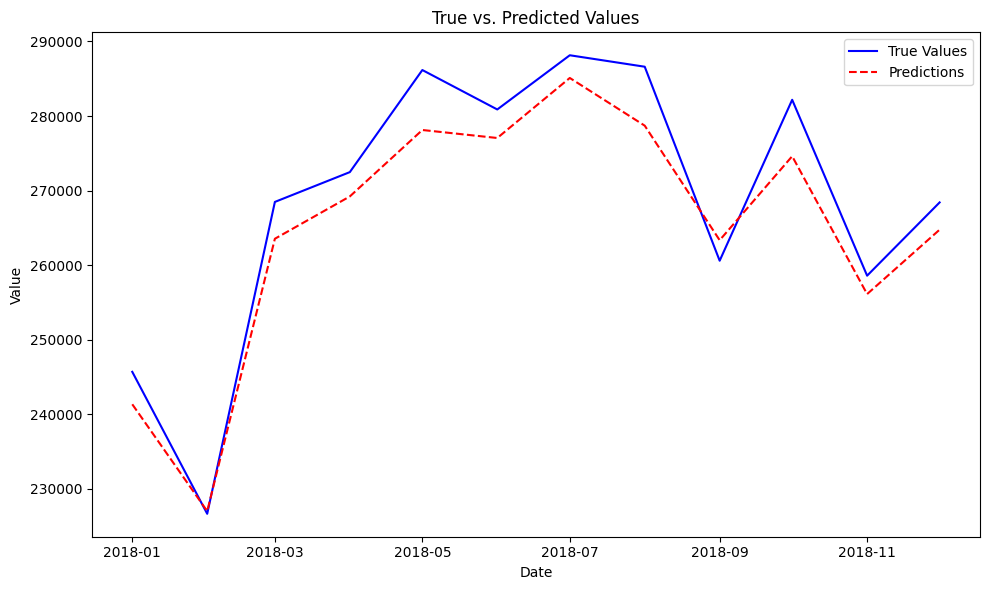

In [47]:
# CODE HERE
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Values'], linestyle='-', color='b', label='True Values')
plt.plot(results_df.index, results_df['Predictions'], linestyle='--', color='r', label='Predictions')
plt.title('True vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

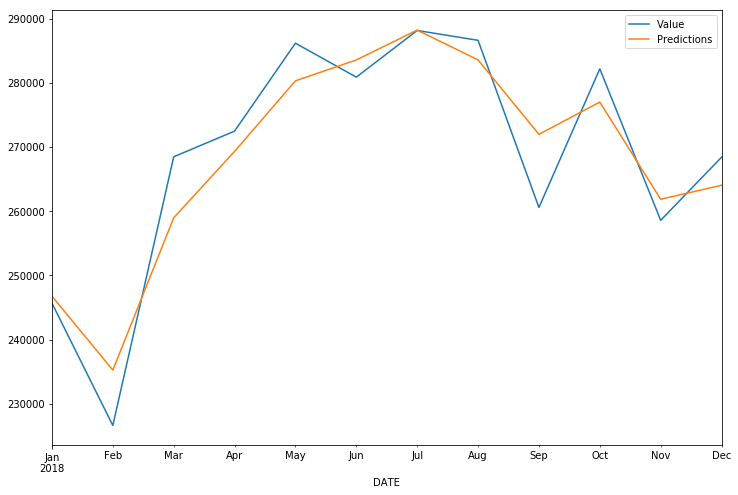

# Saving Models

**TASK: Optional, Save your model!**

# my model already saved from checkpoint from callbacks 😊😊